# Damage Assessment from Social Media Imagery

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

In [4]:
path = Path('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset')

In [5]:
path.ls()

[PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/nepal.test'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/ruby_typhoon'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/gg.dev'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/nepal_eq'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/ecuador_eq'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/matthew.test'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/matthew_hurricane'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/ecuador.test'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/README.txt'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/matthew.dev'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/ruby.train'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Datase

In [6]:
path_img = path/'nepal_eq'

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/nepal_eq/nepal_eq_none_im_25689.jpg'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/nepal_eq/nepal_eq_none_im_8803.jpg'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/nepal_eq/nepal_eq_none_im_22269.jpg'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/nepal_eq/nepal_eq_severe_im_38488.jpg'),
 PosixPath('/home/jmn21373/.fastai/data/ASONAM17_Damage_Image_Dataset/nepal_eq/nepal_eq_none_im_14048.jpg')]

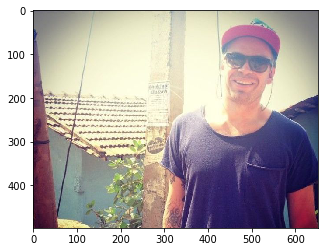

In [10]:
img = plt.imread(fnames[1500])
plt.imshow(img);

In [11]:
dftrain = pd.read_csv(path/'nepal.train', sep=' ', header=None)
dftrain.head()

,0,1
0,nepal_eq/nepal_eq_severe_im_16084.jpg,2
1,nepal_eq/nepal_eq_none_im_42600.jpg,0
2,nepal_eq/nepal_eq_none_im_4536.jpg,0
3,nepal_eq/nepal_eq_severe_im_41412.jpg,2
4,nepal_eq/nepal_eq_none_im_31122.jpg,0


In [12]:
dftest = pd.read_csv(path/'nepal.test', sep=' ', header=None)
dftest.head()

,0,1
0,nepal_eq/nepal_eq_severe_im_11821.jpg,2
1,nepal_eq/nepal_eq_severe_im_19519.jpg,2
2,nepal_eq/nepal_eq_severe_im_33423.jpg,2
3,nepal_eq/nepal_eq_severe_im_23786.jpg,2
4,nepal_eq/nepal_eq_severe_im_12447.jpg,2


In [13]:
dftrain = dftrain.assign(is_valid = lambda x: False)

In [14]:
dftest = dftest.assign(is_valid = lambda x: True)

In [15]:
dftrain.head()

,0,1,is_valid
0,nepal_eq/nepal_eq_severe_im_16084.jpg,2,False
1,nepal_eq/nepal_eq_none_im_42600.jpg,0,False
2,nepal_eq/nepal_eq_none_im_4536.jpg,0,False
3,nepal_eq/nepal_eq_severe_im_41412.jpg,2,False
4,nepal_eq/nepal_eq_none_im_31122.jpg,0,False


In [16]:
dftest.head()

,0,1,is_valid
0,nepal_eq/nepal_eq_severe_im_11821.jpg,2,True
1,nepal_eq/nepal_eq_severe_im_19519.jpg,2,True
2,nepal_eq/nepal_eq_severe_im_33423.jpg,2,True
3,nepal_eq/nepal_eq_severe_im_23786.jpg,2,True
4,nepal_eq/nepal_eq_severe_im_12447.jpg,2,True


In [17]:
df = pd.concat([dftrain, dftest])

In [18]:
df.columns = ['name', 'labelnum', 'is_valid']

0 none
1 mild
2 severe

In [19]:
def lab(x):
    if (x == 0):
        return 'none'
    elif(x == 1):
        return 'mild'
    else:
        return 'severe'

In [20]:
df['label'] = df.labelnum.apply(lab)

In [21]:
df.drop(["labelnum", "is_valid"], axis = 'columns', inplace=True)

In [22]:
df.head()

,name,label
0,nepal_eq/nepal_eq_severe_im_16084.jpg,severe
1,nepal_eq/nepal_eq_none_im_42600.jpg,none
2,nepal_eq/nepal_eq_none_im_4536.jpg,none
3,nepal_eq/nepal_eq_severe_im_41412.jpg,severe
4,nepal_eq/nepal_eq_none_im_31122.jpg,none


In [23]:
df.describe()

,name,label
count,15283,15283
unique,15283,3
top,nepal_eq/nepal_eq_none_im_42869.jpg,severe
freq,1,7142


In [24]:
df[df['label']=='severe'].count()

name     7142
label    7142
dtype: int64

In [25]:
df[df['label']=='mild'].count()

name     1805
label    1805
dtype: int64

In [26]:
df[df['label']=='none'].count()

name     6336
label    6336
dtype: int64

In [27]:
data = (ImageDataBunch.from_df(path=path, df=df, ds_tfms=get_transforms(), size=224, bs=bs)
       )

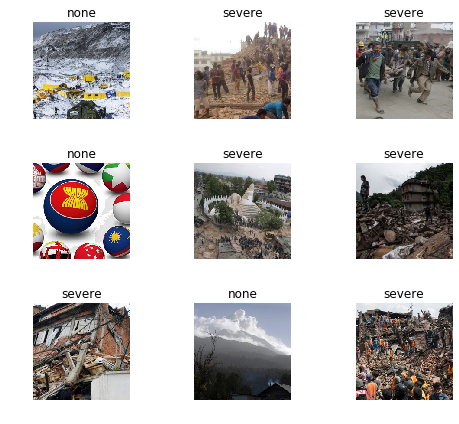

In [28]:
data.show_batch(rows=3, figsize=(7,6))

In [24]:
print(data.classes)
len(data.classes),data.c

['mild', 'none', 'severe']


(3, 3)

## Training: resnet34

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [26]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.660561,0.507849,0.184228,01:01
1,0.533559,0.476959,0.173102,00:51
2,0.486027,0.450044,0.160668,00:52
3,0.455855,0.445226,0.155759,00:51


In [27]:
learn.metrics = [error_rate, accuracy]

In [28]:
learn.validate()

[0.44522607, tensor(0.1558), tensor(0.8442)]

In [63]:
learn.save('stage-1')

## Results

In [64]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

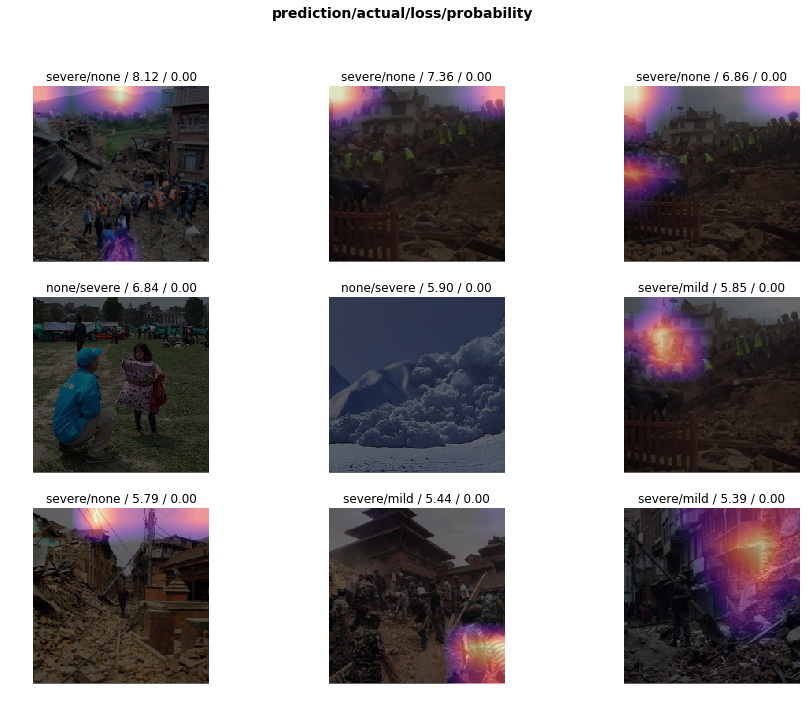

In [65]:
interp.plot_top_losses(9, figsize=(15,11))

It certainly appears to me that some of the images are mis-labeled.  

In [67]:
doc(interp.plot_top_losses)

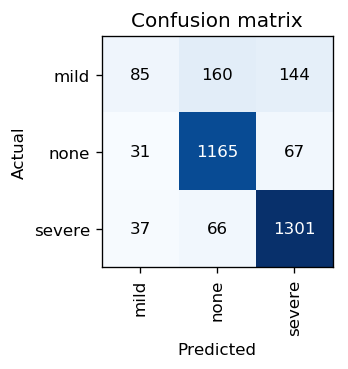

In [83]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=120)

In [69]:
interp.most_confused(min_val=2)

[('mild', 'none', 160),
 ('mild', 'severe', 144),
 ('none', 'severe', 67),
 ('severe', 'none', 66),
 ('severe', 'mild', 37),
 ('none', 'mild', 31)]

## Unfreezing, fine-tuning, and learning rates

In [70]:
learn.unfreeze()

In [71]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.470853,0.440450,0.158704,0.841296,00:54


In [76]:
learn.load('stage-1');

In [77]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


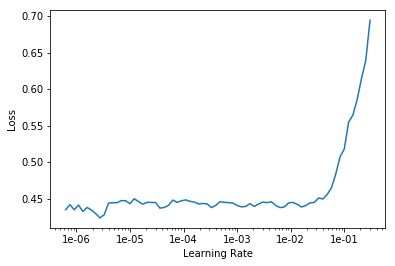

In [78]:
learn.recorder.plot()

It doesn't look like we are going to get any better.

That's a pretty accurate model!

## Training: resnet50

In [84]:
data = (ImageDataBunch.from_df(path=path, df=df, ds_tfms=get_transforms(), size=299, bs=bs)
       )

Have to download resnet50 model for the first time on command line; proxy won't work from notebook.

In [86]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


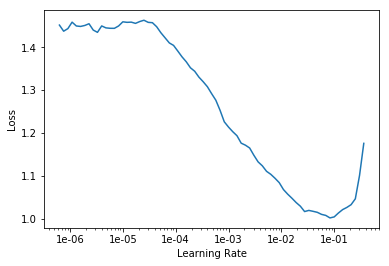

In [87]:
learn.lr_find()
learn.recorder.plot()

In [88]:
learn.fit_one_cycle(8, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.575843,0.503766,0.834751,01:47
1,0.502442,0.490050,0.826243,01:44
2,0.490083,0.517880,0.819699,01:44
3,0.475190,0.491426,0.829516,01:46
4,0.430178,0.448769,0.841296,01:44
5,0.401991,0.434340,0.851767,01:44
6,0.367577,0.426382,0.854712,01:45
7,0.338787,0.423991,0.852749,01:44


In [89]:
learn.save('stage-1-50')

In [90]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.339544,0.422912,0.857003,02:15
1,0.341197,0.422161,0.852749,02:15
2,0.312933,0.419234,0.852749,02:13


In [91]:
learn.load('stage-1-50');

In [92]:
interp = ClassificationInterpretation.from_learner(learn)

In [93]:
interp.most_confused(min_val=2)

[('mild', 'none', 139),
 ('mild', 'severe', 102),
 ('none', 'mild', 61),
 ('severe', 'mild', 53),
 ('severe', 'none', 52),
 ('none', 'severe', 43)]

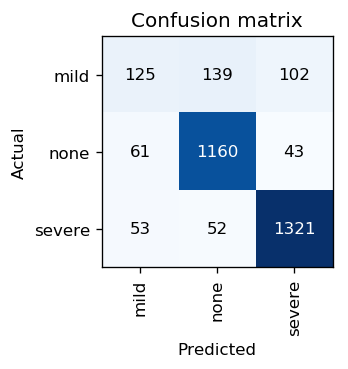

In [94]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=120)